In [22]:
# source https://rpubs.com/Hgoswami/377338

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import decomposition
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USArrests.csv",columns='')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
df = df.rename(columns={'Unnamed: 0': 'state'})

In [9]:
df.columns

Index(['state', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
X = df[['Murder','Assault','UrbanPop','Rape']]
Y = df[['state']]

In [11]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(X)

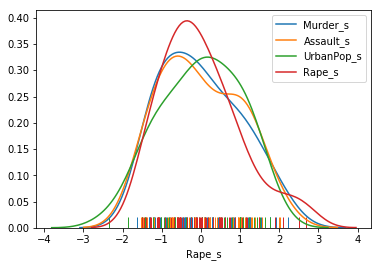

In [12]:

df1 = pd.DataFrame(x_std,columns=['Murder_s','Assault_s','UrbanPop_s','Rape_s'])
sns.distplot(df1['Murder_s'],hist=False, rug=True, label='Murder_s')
sns.distplot(df1['Assault_s'],hist=False, rug=True, label='Assault_s')
sns.distplot(df1['UrbanPop_s'],hist=False, rug=True, label='UrbanPop_s')
sns.distplot(df1['Rape_s'],hist=False, rug=True, label='Rape_s')


In [14]:
pca = decomposition.PCA(n_components=4)
sklearn_pca_x = pca.fit_transform(x_std)

In [19]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [20]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

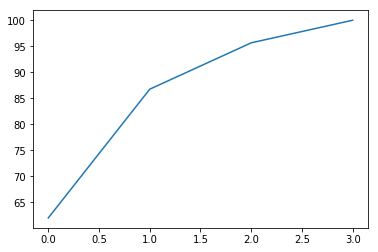

In [21]:
plt.plot(var1)

The below biplot shows that 50 states mapped according to the 2 principal components. The vectors of the PCA for 4 variables are also plotted.

The large positive scores on the first component, such as California, Nevada and Florida, have high crime rates, while states like North Dakota, with negative scores on the first component, have low crime rates.
California also has a high score on the second component, indicating a high level of urbanization, while the opposite is true for states like Mississippi.
States close to zero on both components, such as Indiana, have approximately average levels of both crime and urbanization.